# DSCI100 Group 5 Project Proposal
Group Members: Chengyuan Yao, Eunji Hwang, Lina Anwari, Duffy Du
# Title: 
# Table of Contents:
1. [Introduction](#introduction)
2. [Preliminary exploratory data analysis](#prelim-data)
3. [Methods](#methods)
4. [Expected outcomes and significance](#outcome-significance)


# 1.0 Introduction <a id='introduction'></a>

Cardiovascular disease is one of the leading causes of death globally. This disease, also known as heart disease, is linked to several factors such as cholesterol levels, age, obesity, smoking, and numerous more. For our classification model we are using the Heart Disease Data Set. The data analyzed is the Cleveland database which contains information collected by Robert Detrano (M.D., Ph D.) from the Medical Center, Cleveland Clinic Foundation and is based on anonymous real-life patients’ records. Each row represents a report on different patients according to the 14 categories, including the predicted attribute. Using this dataset, the question being inquired is according to the numerical values picked from the Cleveland database, is there a relationship that predicts the diagnosis of heart disease?





Heart Disease Data Set Variables/Descriptions:
1.  age - age in years
2.  sex
3.  cp
4.  trestbps - resting blood pressure (in mm Hg on admission to hospital)
5.  chol - serum cholestoral in mg/dl
6.  fbs
7.  restecg
8.  thalach - maximum heart rate achieved
9.  exang
10. oldpeak - ST depression induced by exercise relative to rest
11. slope
12. ca
13. thal
14. num

The variables used for our classification model are: age, trestbps, chol, thalach, oldpeak

## <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 1.1 Heart Disease Data set variable descriptions:
1. #3 (age) - age in years
2. #4 (sex) - sex (1 = male; 0 = female)
3. #9 (cp) - chest pain type
	-- Value 1: typical angina
	-- Value 2: atypical angina
	-- Value 3: non-anginal pain
	-- Value 4: asymptomatic
4. #10 (trestbps) - resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) - serum cholestoral in mg/dl
6. #16 (fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg) - restecg: resting electrocardiographic results
	-- Value 0: normal
	-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
	-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach) - maximum heart rate achieved
9. #38 (exang) - exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) - ST depression induced by exercise relative to rest
11. #41 (slope) - the slope of the peak exercise ST segment
	-- Value 1: upsloping
	-- Value 2: flat
	-- Value 3: downsloping
12. #44 (ca) - number of major vessels (0-3) colored by flourosopy
13. #51 (thal) - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute) - num: diagnosis of heart disease (angiographic disease status)
	-- Value 0: < 50% diameter narrowing
	-- Value 1: > 50% diameter narrowing
    
Note about num:
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)



Numerical: 
- age
- trestbps
- chol
- thalach
- oldpeak

Categorical:
- sex
- cp - chest pain type
- fbs
- restecg
- exang
- slope
- ca
- thal
- num

Predicted attribute:
- num --> tranformed to diagnosis (0 = no diagnosis , 1 = diagnosis present (including values of 1, 2, 3, 4))

# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.0 Preliminary Exploratory Data Analysis<a id='prelim-data'></a>

In [27]:
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
install.packages("expss")
library(expss)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.1 Reading and Checking data





In [48]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                           col_names = c("age", 
                                         "sex", 
                                         "cp", 
                                         "trestbps", 
                                         "chol", 
                                         "fbs", 
                                         "restercg", 
                                         "thalach", 
                                         "exang", 
                                         "oldpeak", 
                                         "slope", 
                                         "ca", 
                                         "thal", 
                                         "num"))
cleveland_data$num <- as.factor(cleveland_data$num)
head(cleveland_data)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restercg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restercg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [49]:
# see if there is other number rather than 0-4 in the num column
cleveland_data  %>%
    select(num)  %>% 
    unlist() %>% 
    levels()


[1] "0" "1" "2" "3" "4"

In [65]:
# transform num from 0-4 to 0 or 1 (1, 2, 3, 4) and store into diagnosis variable
cleveland_data <- cleveland_data %>%
                  mutate(diagnosis = dplyr::recode(num, '0' = 'absent', .default = 'present'))

head(cleveland_data)

age,sex,cp,trestbps,chol,fbs,restercg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,absent
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,present
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,present
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,absent
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,absent
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,absent


As the result we get correct data in the diagnosiscolumn

In [66]:
# to see how the original data distribute
cleveland_data %>% 
    group_by(diagnosis) %>%
    summarize(n = n())


`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n
<fct>,<int>
absent,164
present,139


## <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.2 Tidy the data

In [67]:
# We select all the numerical columns and diagnosis column
cleveland_data2 <- cleveland_data%>%
            select(age, trestbps, chol, thalach, oldpeak, diagnosis)
head(cleveland_data2)

age,trestbps,chol,thalach,oldpeak,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,absent
67,160,286,108,1.5,present
67,120,229,129,2.6,present
37,130,250,187,3.5,absent
41,130,204,172,1.4,absent
56,120,236,178,0.8,absent


In [68]:
# split the data into trainning and testing (ratio = 3:1)
set.seed(2344) 
cleveland_data_split<- initial_split(cleveland_data2, prop = 0.75, strata = diagnosis)  
cleveland_data_train<- training(cleveland_data_split)   
cleveland_data_test<- testing(cleveland_data_split)

In [54]:
# Summary statistics (max, min, mean, median and SD) of numerical variables
summary_data <-cleveland_data_train %>%
                apply_labels(age= "age",
                            trestbps = "trestbps",
                            chol = "chol",
                            thalach = "thalach",
                            oldpeak = "oldpeak")
                             
summary_table <- summary_data %>%
                 tab_cells(age, trestbps, chol, thalach, oldpeak) %>%
                 tab_cols(total(label = "Summary Statistics"))  %>%
                 tab_stat_fun(Max = w_max, Min = w_min, Mean = w_mean, "Median" = w_median, "Standand Deviation " = w_sd, method = list) %>%
                tab_pivot()
summary_table

|          | Summary Statistics |     |       |        |                     |
 |          |                Max | Min |  Mean | Median | Standand Deviation  |
 | -------- | ------------------ | --- | ----- | ------ | ------------------- |
 |      age |               77.0 |  29 |  54.3 |   55.0 |                 9.2 |
 | trestbps |              192.0 |  94 | 132.0 |  130.0 |                17.4 |
 |     chol |              564.0 | 131 | 247.1 |  240.0 |                52.8 |
 |  thalach |              202.0 |  71 | 149.8 |  154.0 |                23.5 |
 |  oldpeak |                5.6 |   0 |   1.0 |    0.6 |                 1.1 |

##  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3 Graphs of Relationships
[2.3.1 Age and Resting Blood Pressure as predictors of Heart Disease Diagnosis](#age-rbp)  
[2.3.2 Age and Serum Cholesterol as predictors of Heart Disease Diagnosis](#age-chol)  
[2.3.3 Age and Maximum Heart Rate as predictors of Heart Disease Diagnosis](#age-mhr)  
[2.3.4 Age and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis](#age-stdep)  
[2.3.5 Resting Blood Pressure and Serum Cholesterol as predictors of Heart Disease Diagnosis](#rbp-chol)  
[2.3.6 Resting Blood Pressure and Maximum Heart Rate as predictors of Heart Disease Diagnosis](#rbp-mhr)  
[2.3.7 Resting Blood Pressure and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis](#rbp-stdep)  
[2.3.8 Serum Cholesterol and Maximum Heart Rate as predictors of Heart Disease Diagnosis](#chol-mhr)  
[2.3.9 Serum Cholesterol and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis](#chol-stdep)  
[2.3.10 Maximum Heart Rate and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis](#mhr-stdep)  
 

###  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.1 Age and Resting Blood Pressure as predictors of Heart Disease Diagnosis<a id='age-rbp'></a>

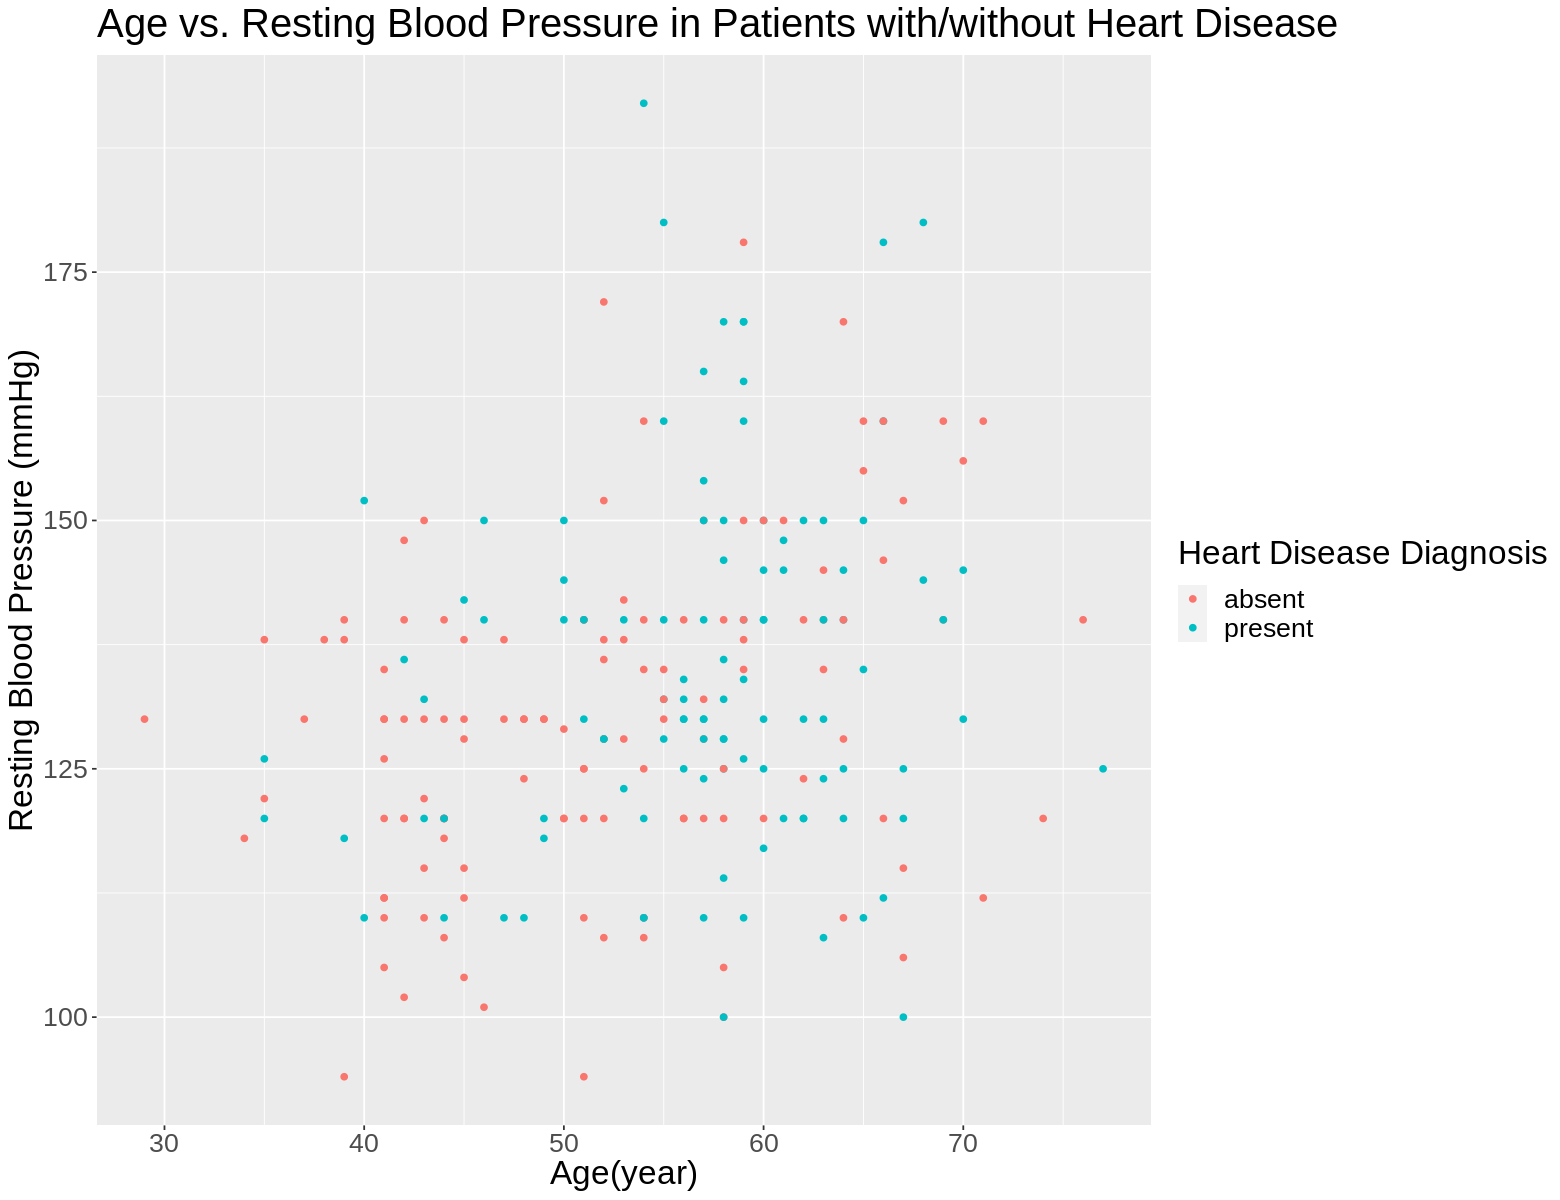

In [79]:
options(repr.plot.width = 13, repr.plot.height = 10)
age_and_trestbps_plot <- ggplot(cleveland_data_train, aes(x = age, y = trestbps, color= diagnosis)) + 
    geom_point() +
    xlab("Age(year)") +
    ylab("Resting Blood Pressure (mmHg)") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Age vs. Resting Blood Pressure in Patients with/without Heart Disease")
age_and_trestbps_plot

###  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.2 Age and Serum Cholesterol as predictors of Heart Disease Diagnosis<a id='age-chol'></a>

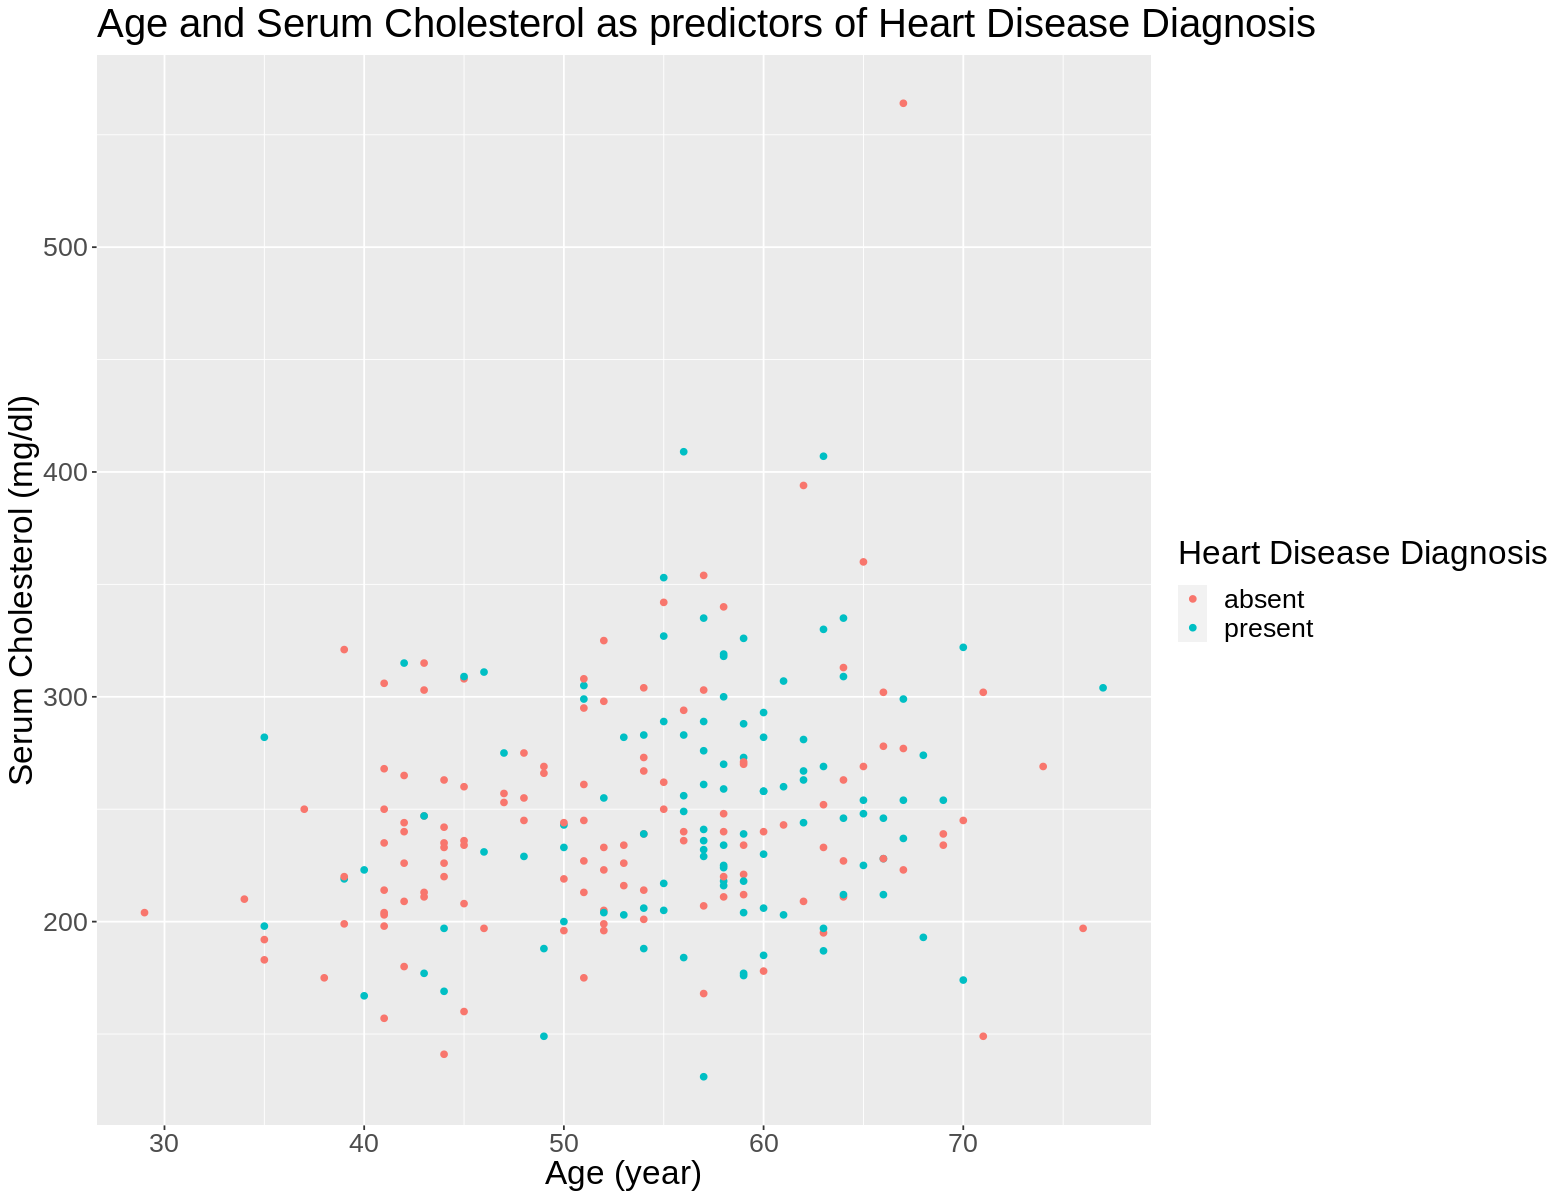

In [81]:
age_and_chol_plot <- ggplot(cleveland_data_train, aes(x = age, y = chol, color = diagnosis)) + 
    geom_point() +
    xlab("Age (year)") +
    ylab("Serum Cholesterol (mg/dl)") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Age and Serum Cholesterol as predictors of Heart Disease Diagnosis")
age_and_chol_plot

### <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.3 Age and Maximum Heart Rate as predictors of Heart Disease Diagnosis<a id='age-mhr'></a>

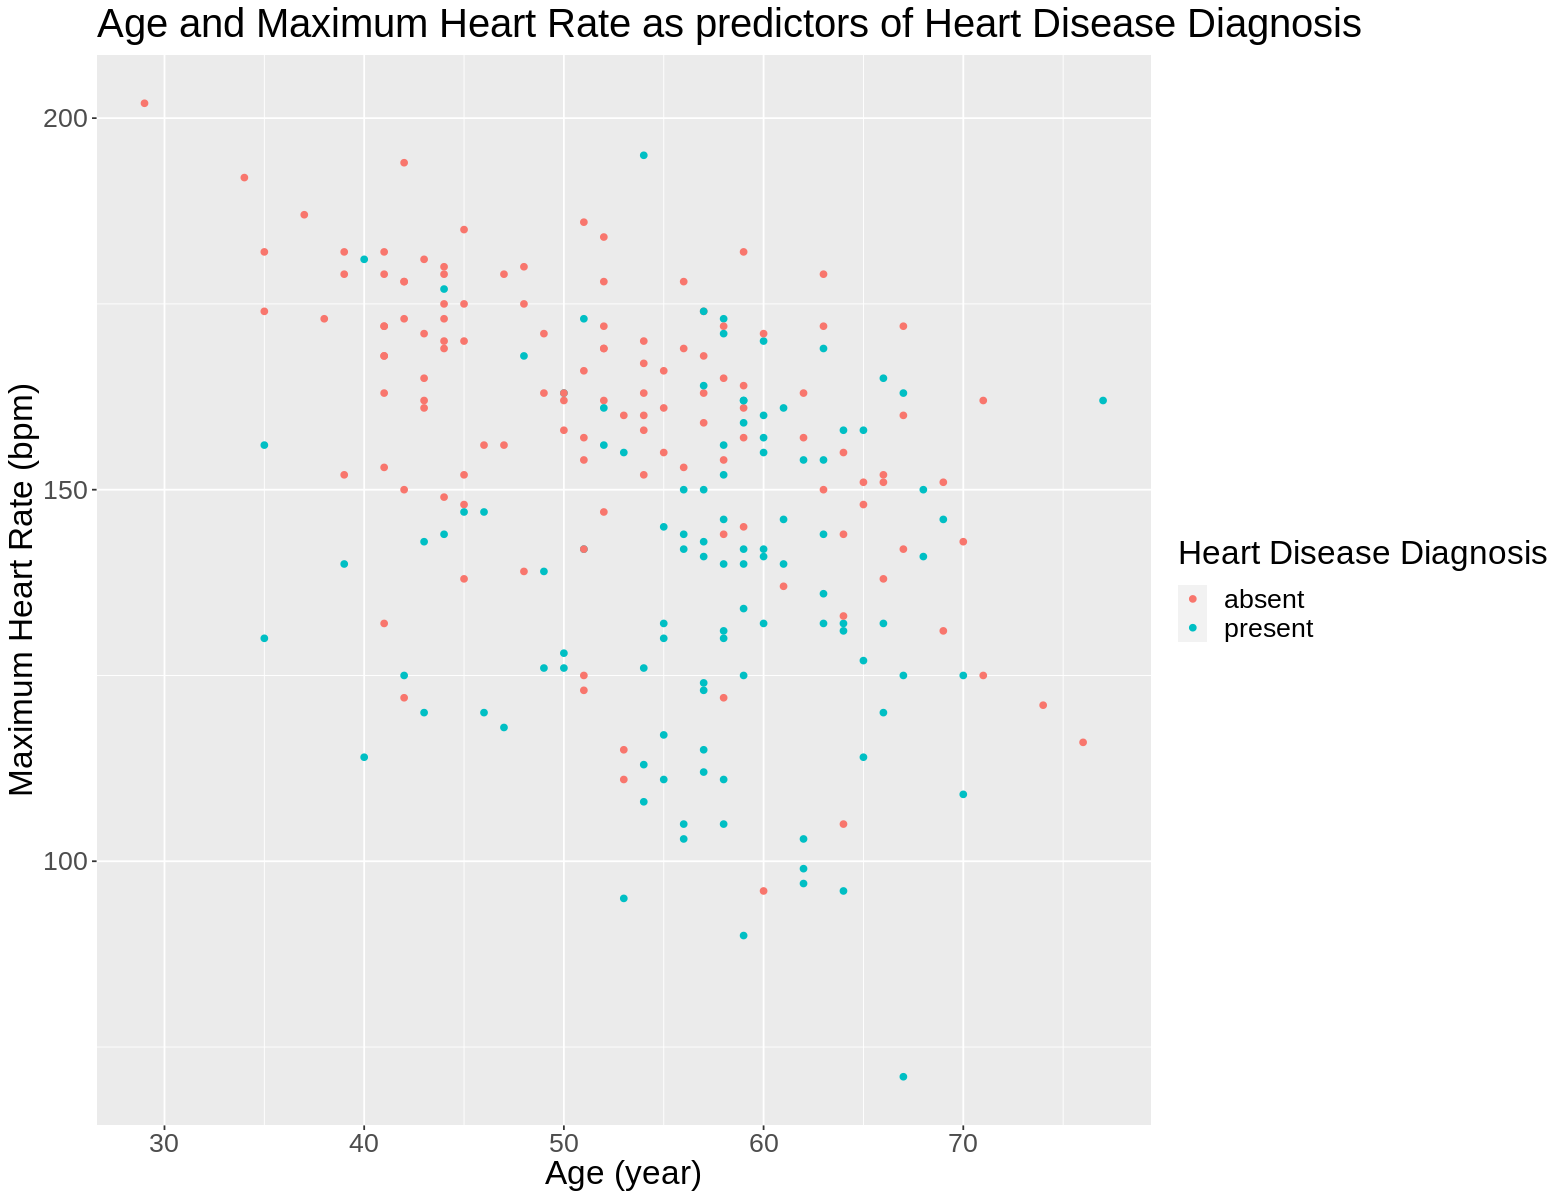

In [89]:
age_and_thalach_plot <- ggplot(cleveland_data_train, aes(x = age, y =  thalach , color= diagnosis)) + 
    geom_point() +
    xlab("Age (year)") +
    ylab("Maximum Heart Rate (bpm)") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Age and Maximum Heart Rate as predictors of Heart Disease Diagnosis")
age_and_thalach_plot

###  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.4 Age and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis <a id='age-stdep'></a>

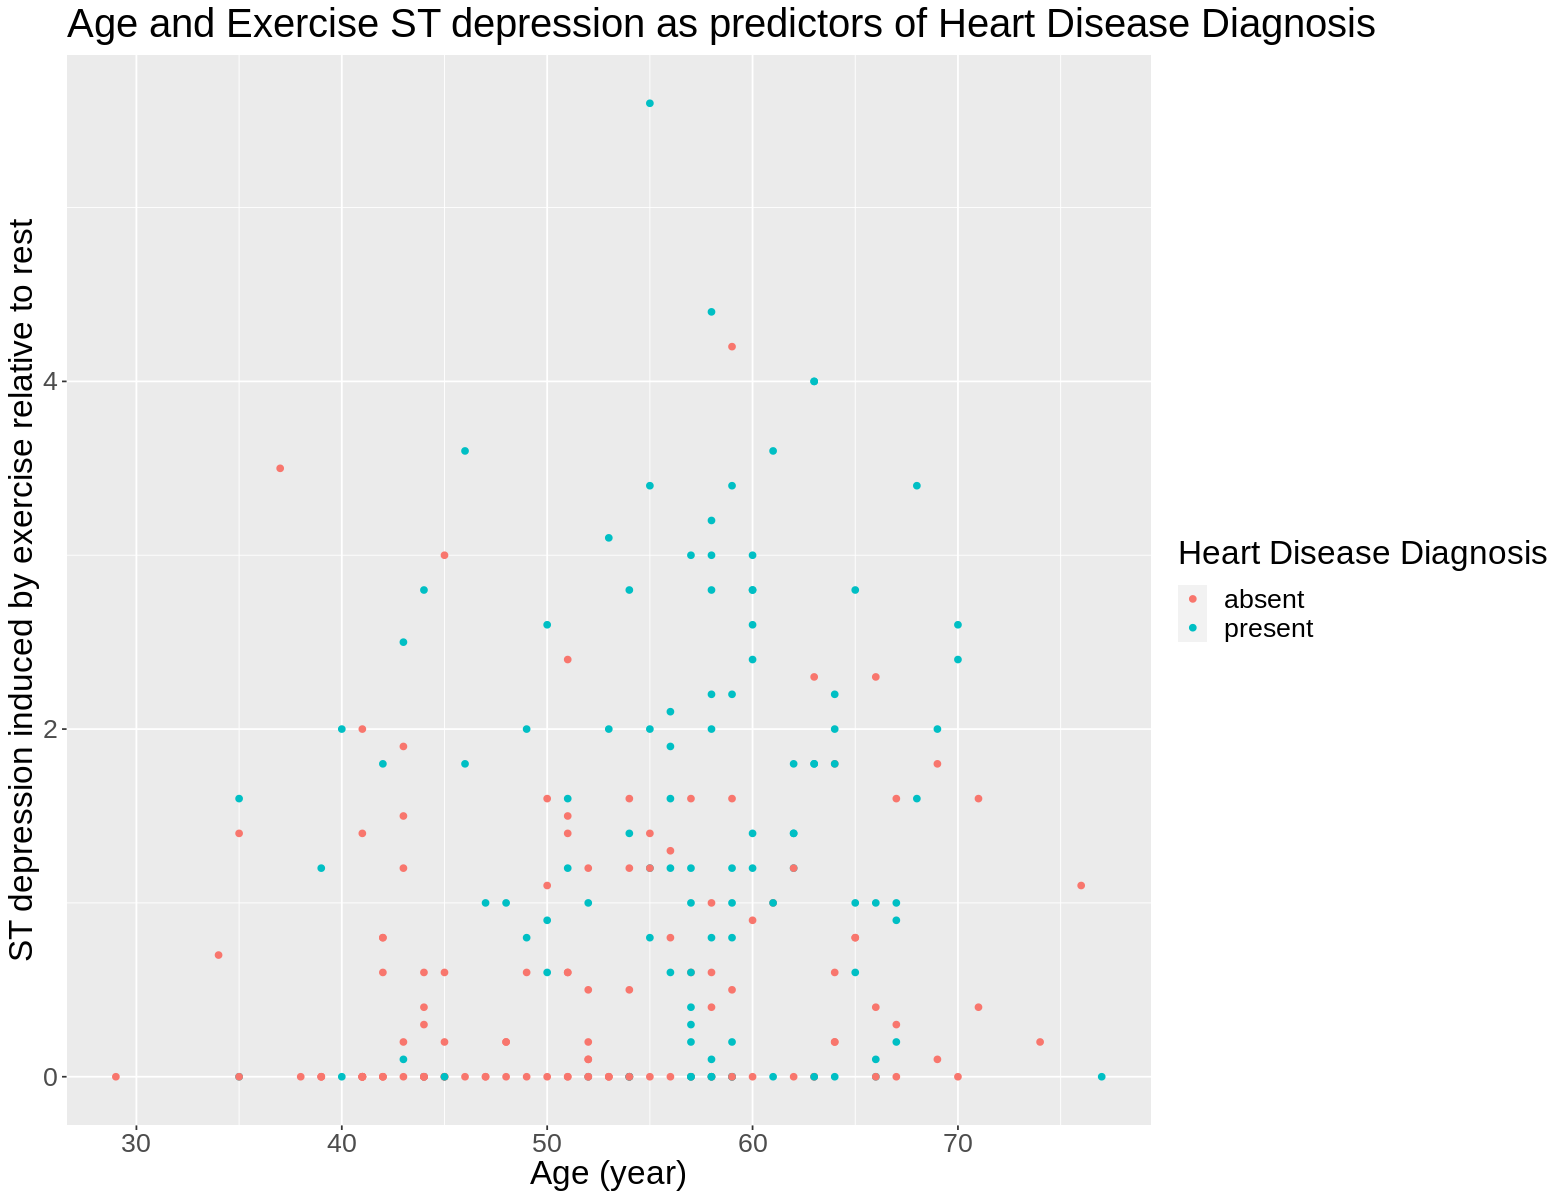

In [90]:
age_and_oldpeak_plot <- ggplot(cleveland_data_train, aes(x = age, y = oldpeak, color = diagnosis)) + 
    geom_point() +
    xlab("Age (year)") +
    ylab("ST depression induced by exercise relative to rest") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Age and Exercise ST depression as predictors of Heart Disease Diagnosis")
age_and_oldpeak_plot

###  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.5 Resting Blood Pressure and Serum Cholesterol as predictors of Heart Disease Diagnosis <a id='rbp-chol'></a>

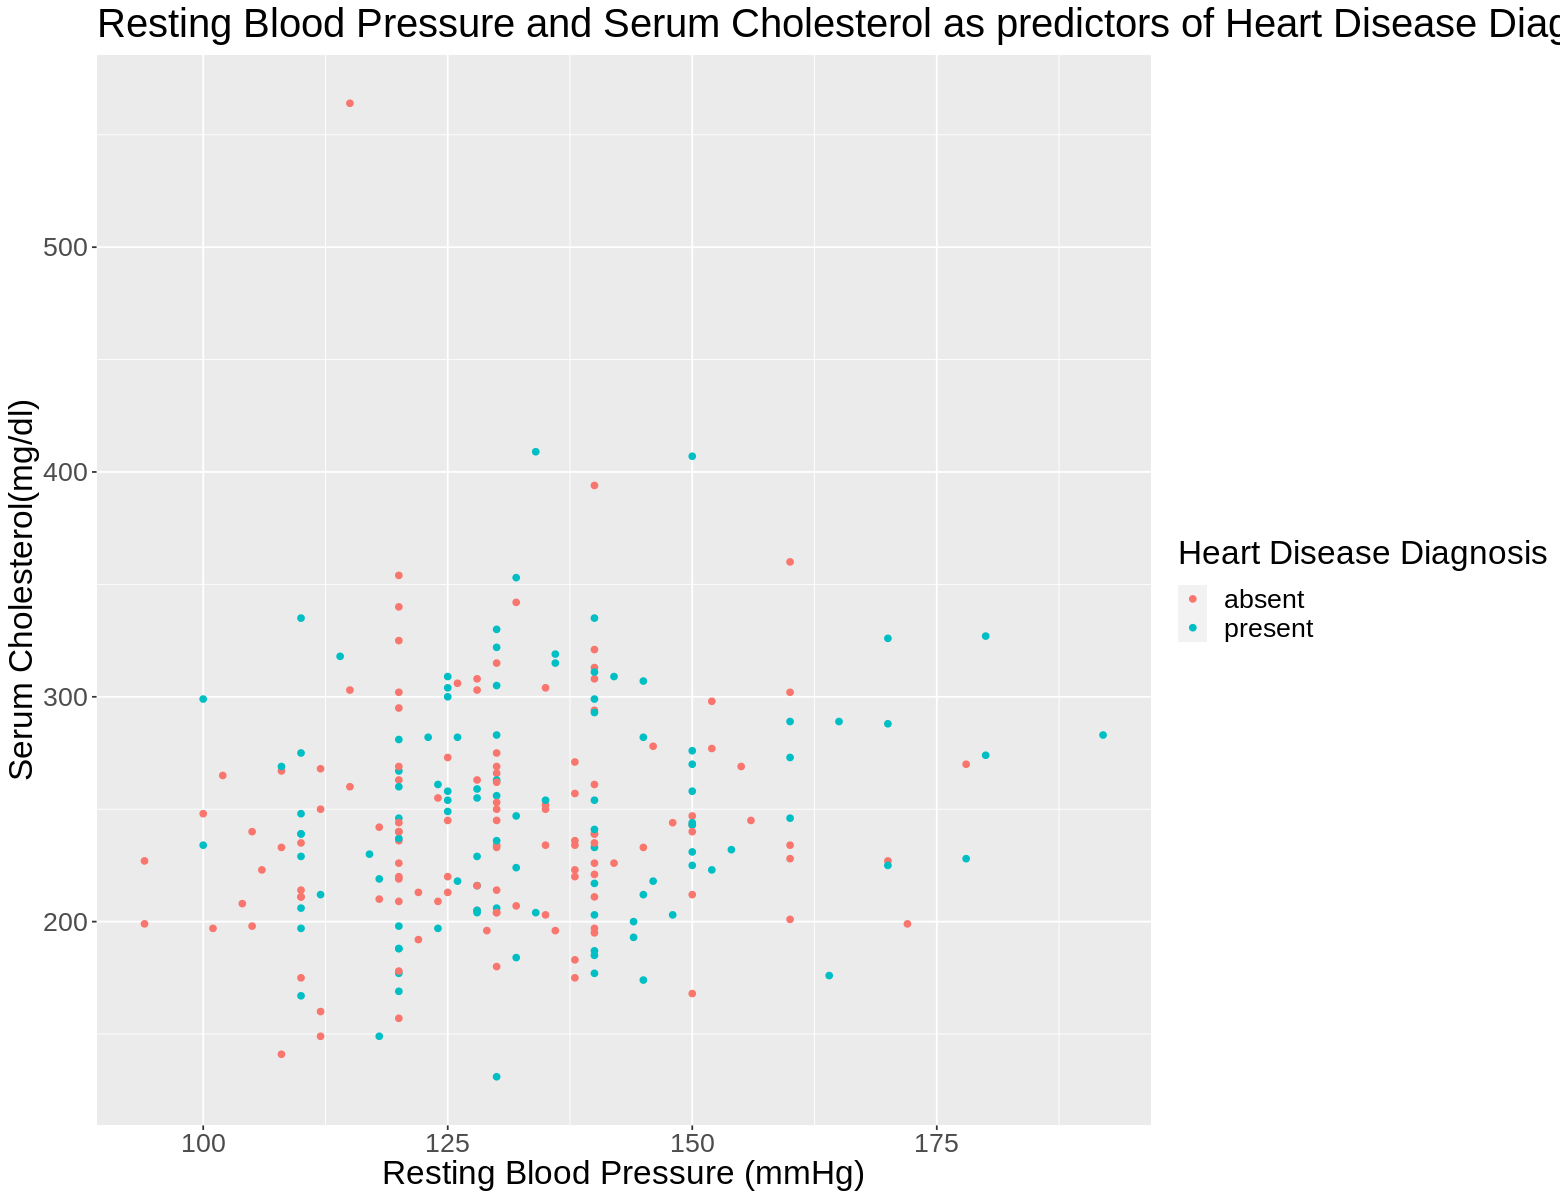

In [91]:
trestbps_and_chol_plot <- ggplot(cleveland_data_train, aes(x = trestbps, y = chol, color= diagnosis)) + 
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Serum Cholesterol(mg/dl)") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Resting Blood Pressure and Serum Cholesterol as predictors of Heart Disease Diagnosis")
trestbps_and_chol_plot

###  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.6 Resting Blood Pressure and Maximum Heart Rate as predictors of Heart Disease Diagnosis <a id='rbp-mhr'></a>

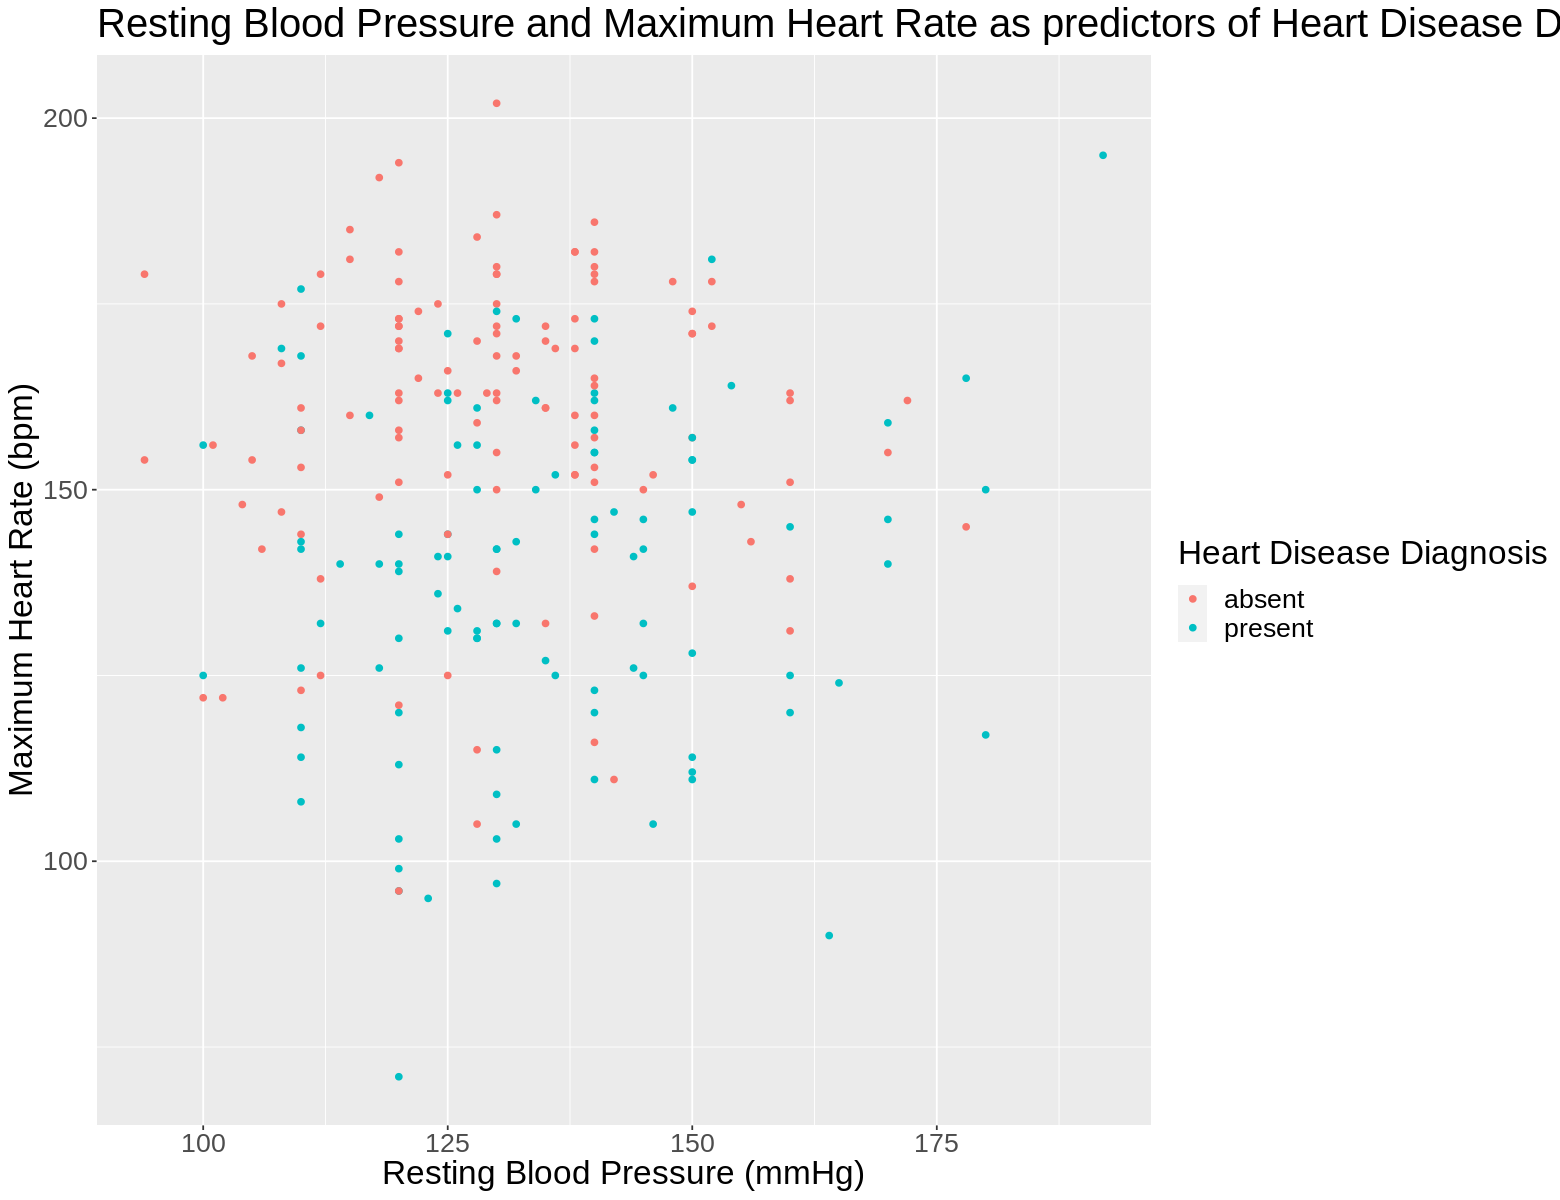

In [94]:
trestbps_and_thalach_plot <- ggplot(cleveland_data_train, aes(x = trestbps, y = thalach, color= diagnosis)) + 
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Maximum Heart Rate (bpm)") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Resting Blood Pressure and Maximum Heart Rate as predictors of Heart Disease Diagnosis")
trestbps_and_thalach_plot

### <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.7 Resting Blood Pressure and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis <a id='rbp-stdep'></a>

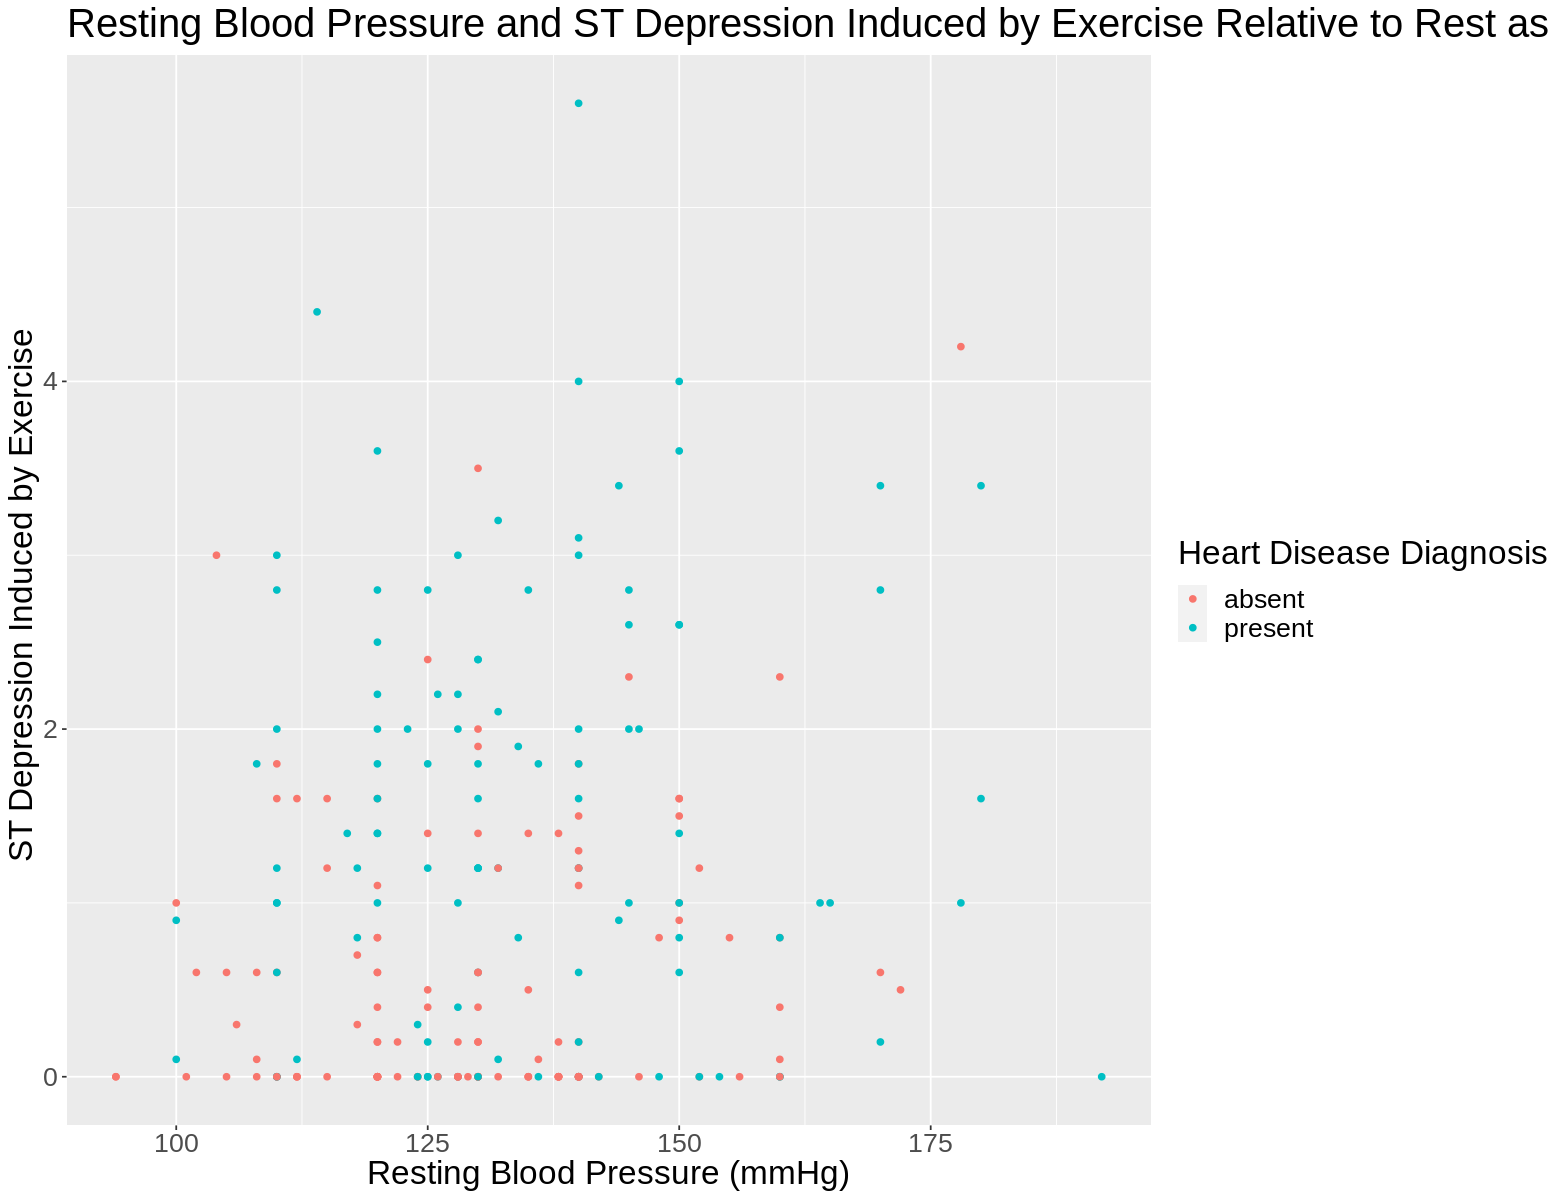

In [95]:
trestbps_and_oldpeak_plot <- ggplot(cleveland_data_train, aes(x = trestbps, y = oldpeak, color = diagnosis)) + 
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("ST Depression Induced by Exercise ") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Resting Blood Pressure and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis")
trestbps_and_oldpeak_plot

### <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.8 Serum Cholesterol and Maximum Heart Rate as predictors of Heart Disease Diagnosis <a id='chol-mhr'></a>

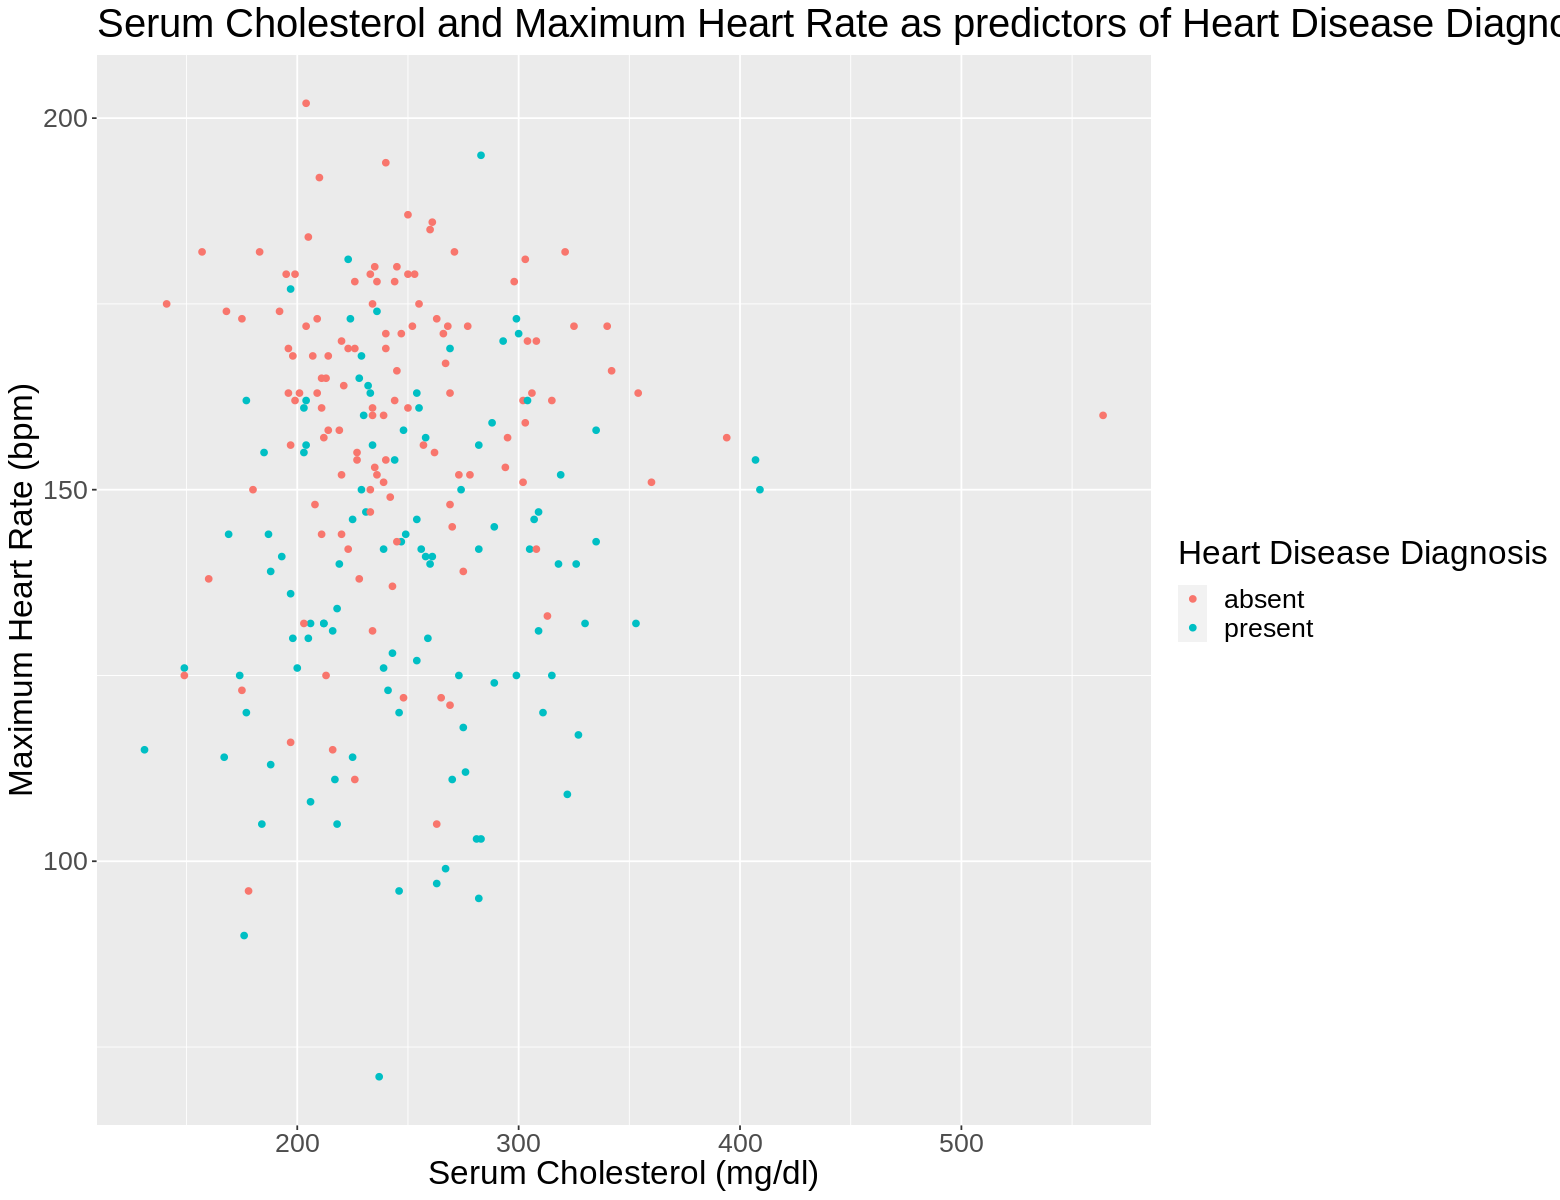

In [96]:
chol_and_thalach_plot <- ggplot(cleveland_data_train, aes(x = chol, y = thalach, color= diagnosis)) + 
    geom_point() +
    xlab("Serum Cholesterol (mg/dl)") +
    ylab("Maximum Heart Rate (bpm)") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Serum Cholesterol and Maximum Heart Rate as predictors of Heart Disease Diagnosis")
chol_and_thalach_plot

### <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.9 Serum Cholesterol and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis <a id='chol-stdep'></a>

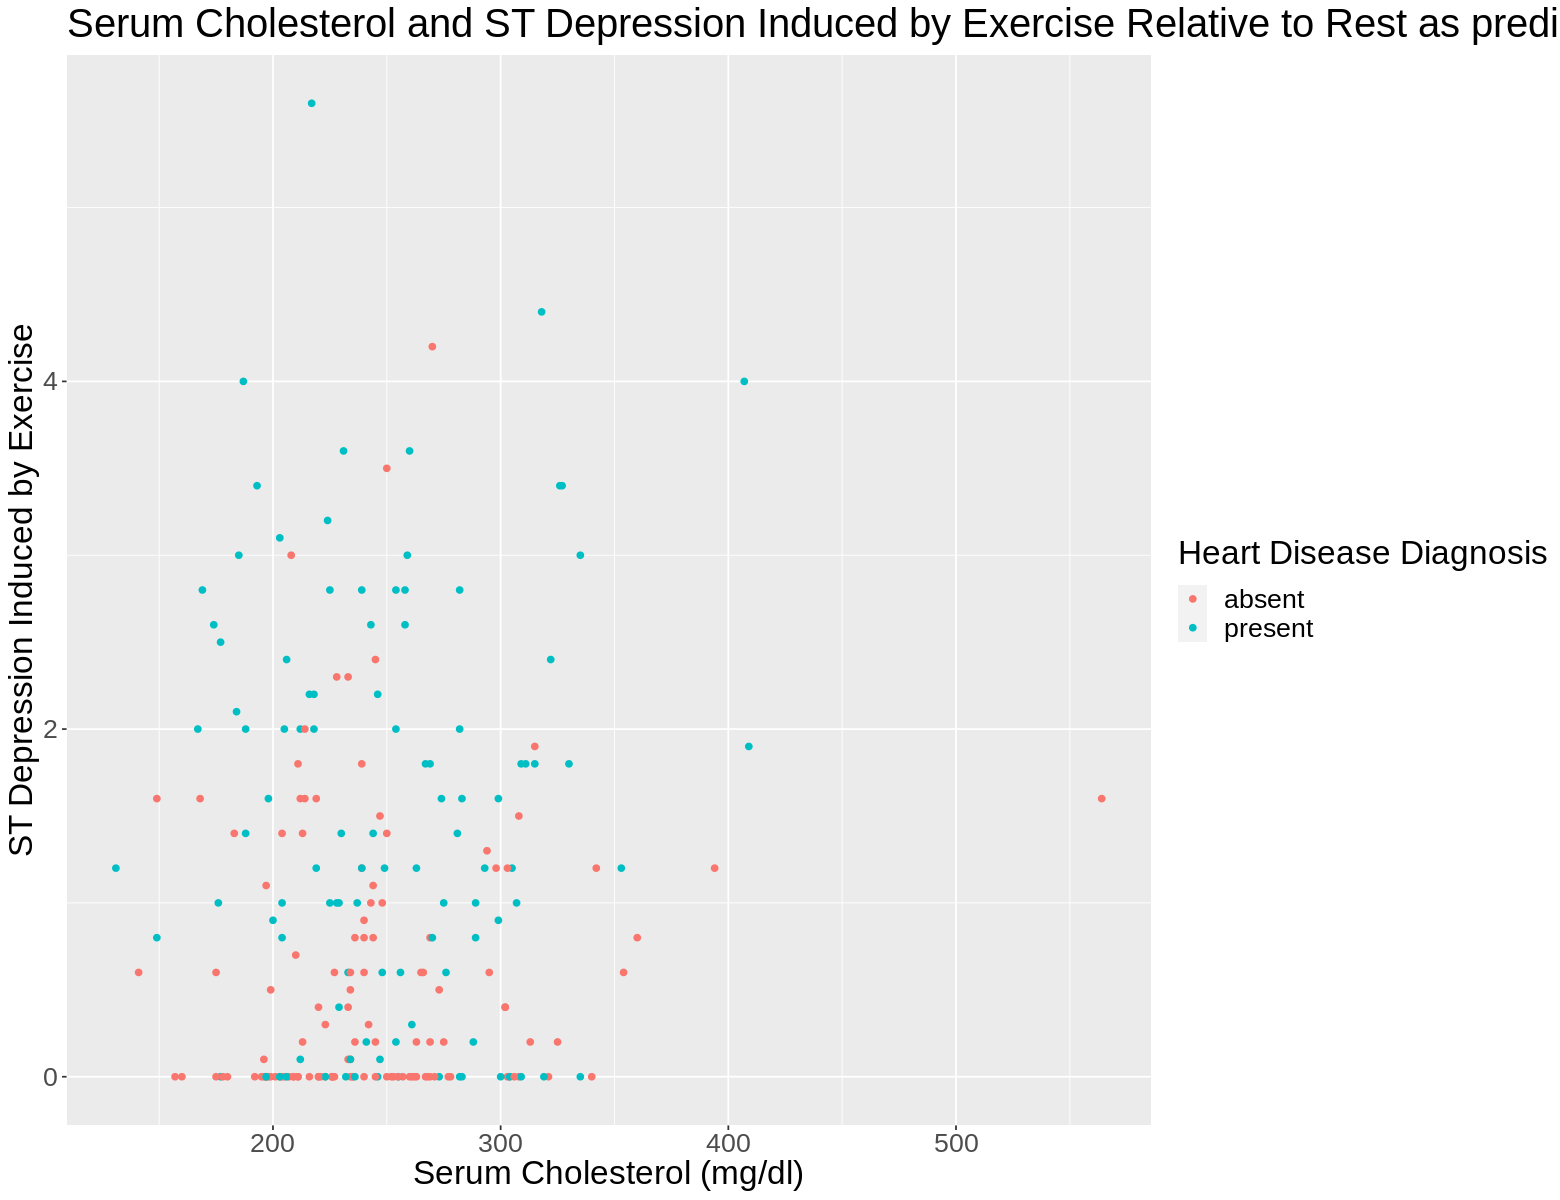

In [97]:
chol_and_oldpeak_plot <- ggplot(cleveland_data_train, aes(x = chol, y = oldpeak, color = diagnosis)) + 
    geom_point() +
    xlab("Serum Cholesterol (mg/dl)") +
    ylab("ST Depression Induced by Exercise") +
    labs(color = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Serum Cholesterol and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis")
chol_and_oldpeak_plot

### <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.10 Maximum Heart Rate and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis <a id='mhr-stdep'></a>

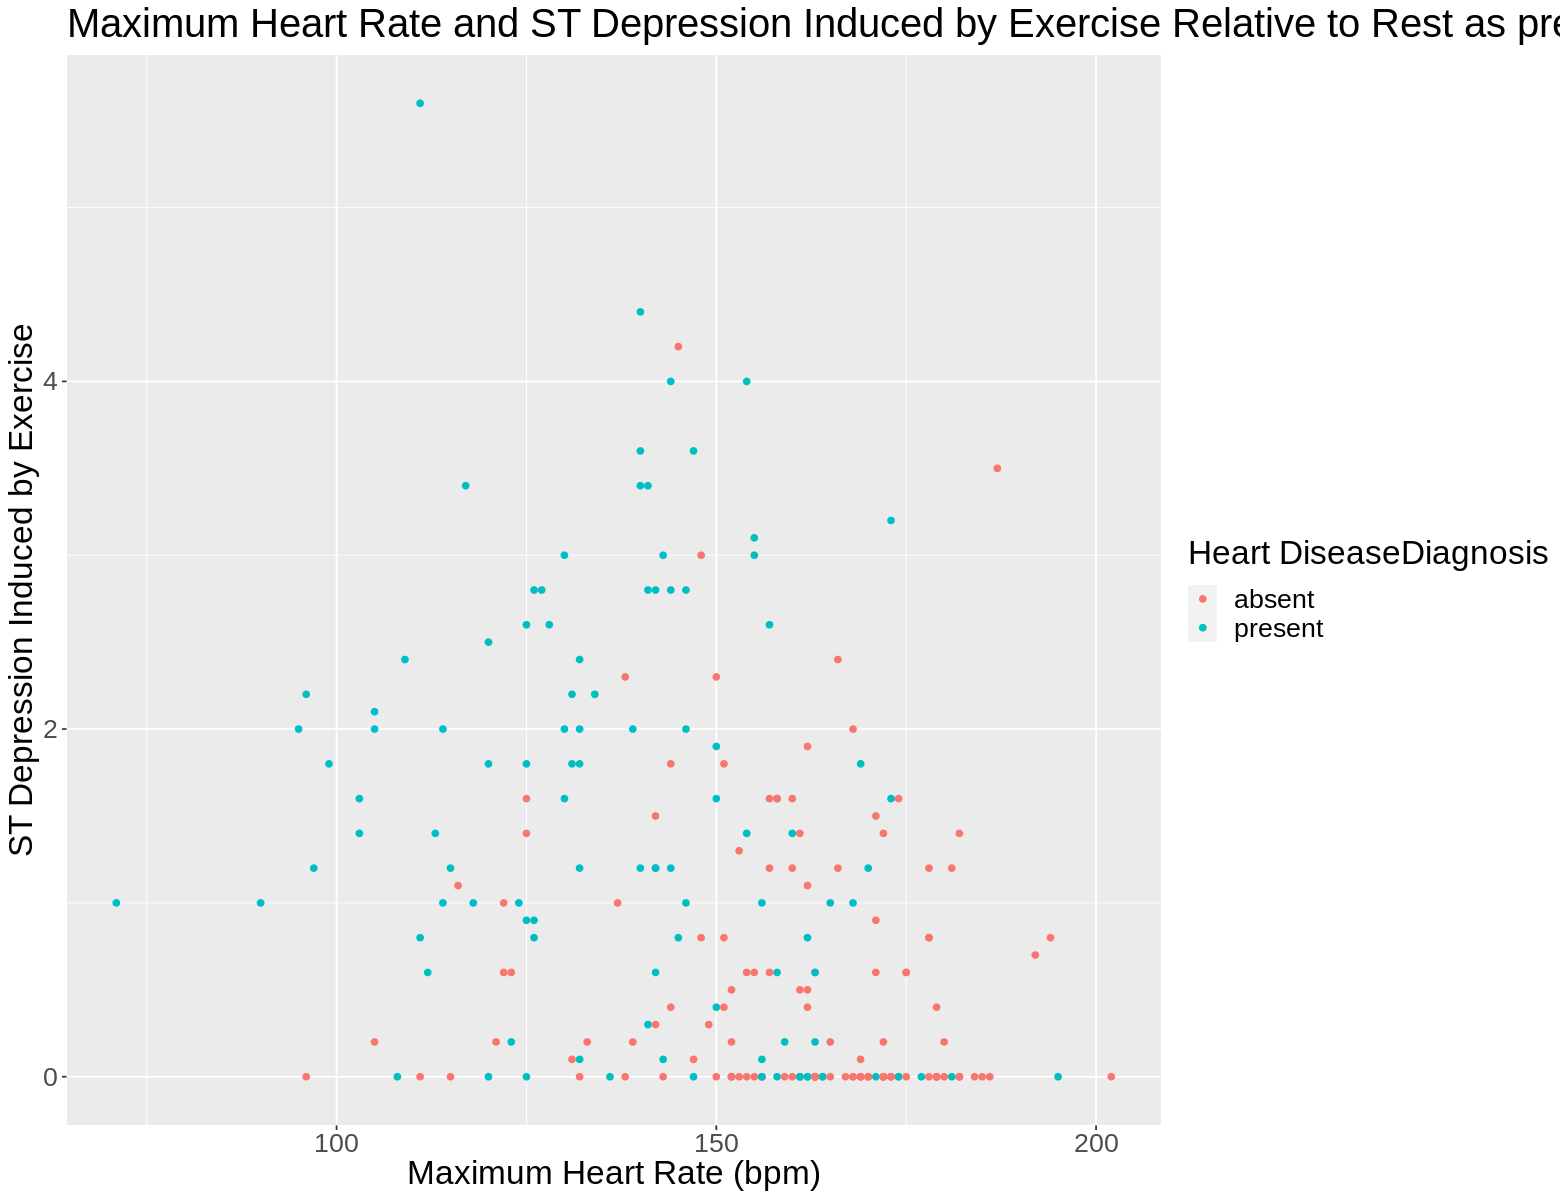

In [100]:
thalach_and_oldpeak_plot <- ggplot(cleveland_data_train, aes(x = thalach, y = oldpeak, color = diagnosis)) + 
    geom_point() +
    xlab("Maximum Heart Rate (bpm)") +
    ylab("ST Depression Induced by Exercise") +
    labs(color = "Heart DiseaseDiagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Maximum Heart Rate and ST Depression Induced by Exercise Relative to Rest as predictors of Heart Disease Diagnosis")
thalach_and_oldpeak_plot

# 3.0 Methods <a id='methods'></a>

With the following key variables that seem to display a correlation with the heart disease diagnosis in our data set, we can create a KNN classfication model to predict heart disease diagnosis:

- Age
- Serum Cholesterol 
- Maximum Heart Rate
- ST depression induced by exercise relative to rest

The KNN classfication model will need to be trained, evaluated, and tuned with training and testing sets before predicting heart diagnosis on a new patient. We will first split our training set to perform a five-fold cross-validation. Next, by plotting K values against the accuracy scores, we will be able to find the appropriate value K for the KNN model that avoids overfitting or underfitting. Then we will use the KNN model with that K value to retrain our entire training set. Finally, we use the predict() function to check the estimated accuracy of our model on the testing dataset. We plan to analyze which combination of predictors will yield the lowest error resulting in a more effective model and visualize it with the two predictors on the x and y axes and color data points according to the presence or absence of a heart disease diagnosis.

# 4.0 Expected outcomes and significance <a id='outcome-significance'></a>

Our classification model determines aspects in the Cleveland database that allows for prediction of heart disease in patients. Therefore, the impact our findings have is spreading awareness to signs of potential fatality caused by this disease to save lives of those who are unaware.
Future questions and research may dive deeper into additional factors influencing heart disease and ways of prevention. It may indicate the invention of new technology after discovering new factors that can predict one’s health according to this disease. Additionally it could lead to questions with answers that devise ways of prevention and allow for more opportunity to those struggling to obtain healthier lifestyles.
